In [1]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from IPython.display import display
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage import io
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import glob
import random
import zipfile
%matplotlib inline


In [2]:
brain_df = pd.read_csv('data_mask.csv')

In [3]:
brain_df

patient_id  \
0     TCGA_CS_5395_19981004   
1     TCGA_CS_5395_19981004   
2     TCGA_CS_5395_19981004   
3     TCGA_CS_5395_19981004   
4     TCGA_CS_5395_19981004   
...                     ...   
3924  TCGA_DU_6401_19831001   
3925  TCGA_DU_6401_19831001   
3926  TCGA_DU_6401_19831001   
3927  TCGA_DU_6401_19831001   
3928  TCGA_DU_6401_19831001   

                                             image_path  \
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
...                                                 ...   
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...   
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...   
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...   
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...   
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...   

                                              mask_path  mask  
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...     0  
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...     0  
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...     0  
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...     0  
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...     0  
...                                                 ...   ...  
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...     0  
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...     0  
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...     0  
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...     0  
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...     0  

[3929 rows x 4 columns]

In [4]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [5]:
brain_df.head(50)

patient_id                                         image_path  \
0   TCGA_CS_5395_19981004  TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1   TCGA_CS_5395_19981004  TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2   TCGA_CS_5395_19981004  TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3   TCGA_CS_5395_19981004  TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4   TCGA_CS_5395_19981004  TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
5   TCGA_CS_5395_19981004  TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif   
6   TCGA_CS_5395_19981004  TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif   
7   TCGA_CS_5395_19981004  TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif   
8   TCGA_CS_5395_19981004  TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1.tif   
9   TCGA_CS_5395_19981004  TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif   
10  TCGA_CS_5395_19981004  TCGA_CS_6669_20020102/TCGA_CS_6669_20020102_1.tif   
11  TCGA_CS_5395_19981004  TCGA_CS_6186_20000601/TCGA_CS_6186_20000601_1.tif   
12  TCGA_CS_5395_19981004  TCGA_DU_5851_19950428/TCGA_DU_5851_19950428_1.tif   
13  TCGA_CS_5395_19981004  TCGA_CS_6665_20010817/TCGA_CS_6665_20010817_1.tif   
14  TCGA_CS_5395_19981004  TCGA_CS_6668_20011025/TCGA_CS_6668_20011025_1.tif   
15  TCGA_CS_5395_19981004  TCGA_DU_5849_19950405/TCGA_DU_5849_19950405_1.tif   
16  TCGA_CS_5395_19981004  TCGA_CS_6290_20000917/TCGA_CS_6290_20000917_1.tif   
17  TCGA_CS_5395_19981004  TCGA_DU_5872_19950223/TCGA_DU_5872_19950223_1.tif   
18  TCGA_CS_5395_19981004  TCGA_DU_5874_19950510/TCGA_DU_5874_19950510_1.tif   
19  TCGA_CS_5395_19981004  TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_1.tif   
20  TCGA_CS_4944_20010208  TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_1.tif   
21  TCGA_CS_4944_20010208  TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_1.tif   
22  TCGA_CS_4944_20010208  TCGA_DU_5852_19950709/TCGA_DU_5852_19950709_1.tif   
23  TCGA_CS_4944_20010208  TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_1.tif   
24  TCGA_CS_4944_20010208  TCGA_DU_6400_19830518/TCGA_DU_6400_19830518_1.tif   
25  TCGA_CS_4944_20010208  TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_1.tif   
26  TCGA_CS_4944_20010208  TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_1.tif   
27  TCGA_CS_4944_20010208  TCGA_DU_6408_19860521/TCGA_DU_6408_19860521_1.tif   
28  TCGA_CS_4944_20010208  TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_1.tif   
29  TCGA_CS_4944_20010208  TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_1.tif   
30  TCGA_CS_4944_20010208  TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_1.tif   
31  TCGA_CS_4944_20010208  TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_1.tif   
32  TCGA_CS_4944_20010208  TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_1.tif   
33  TCGA_CS_4944_20010208  TCGA_DU_7013_19860523/TCGA_DU_7013_19860523_1.tif   
34  TCGA_CS_4944_20010208  TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_1.tif   
35  TCGA_CS_4944_20010208  TCGA_DU_8163_19961119/TCGA_DU_8163_19961119_1.tif   
36  TCGA_CS_4944_20010208  TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_1.tif   
37  TCGA_CS_4944_20010208  TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_1.tif   
38  TCGA_CS_4944_20010208  TCGA_DU_8162_19961029/TCGA_DU_8162_19961029_1.tif   
39  TCGA_CS_4944_20010208  TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif   
40  TCGA_CS_4941_19960909  TCGA_DU_7301_19911112/TCGA_DU_7301_19911112_1.tif   
41  TCGA_CS_4941_19960909  TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_1.tif   
42  TCGA_CS_4941_19960909  TCGA_DU_7302_19911203/TCGA_DU_7302_19911203_1.tif   
43  TCGA_CS_4941_19960909  TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_1.tif   
44  TCGA_CS_4941_19960909  TCGA_DU_A5TP_19970614/TCGA_DU_A5TP_19970614_1.tif   
45  TCGA_CS_4941_19960909  TCGA_DU_8166_19970322/TCGA_DU_8166_19970322_1.tif   
46  TCGA_CS_4941_19960909  TCGA_DU_8165_19970205/TCGA_DU_8165_19970205_1.tif   
47  TCGA_CS_4941_19960909  TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_1.tif   
48  TCGA_CS_4941_19960909  TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_1.tif   
49  TCGA_CS_494

In [6]:
brain_df.mask_path[1]

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [7]:
brain_df.image_path[1]

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

In [8]:
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

In [9]:
brain_df['mask'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [10]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0, 200, 0)', marker_line_color = 'rgb(255,0,0)', marker_line_width = 3, opacity = 0.6)

fig.show()


In [11]:
brain_df.mask_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: mask_path, Length: 3929, dtype: object

In [12]:
brain_df.image_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: image_path, Length: 3929, dtype: object

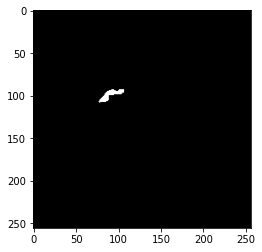

In [13]:
plt.imshow(cv2.imread(brain_df.mask_path[623]))

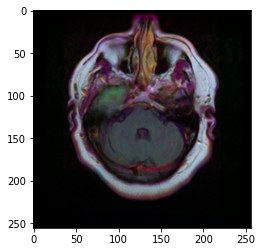

In [14]:
plt.imshow(cv2.imread(brain_df.image_path[623]))

In [15]:
cv2.imread(brain_df.mask_path[623]).max()

255

In [16]:
cv2.imread(brain_df.mask_path[623]).min()

0

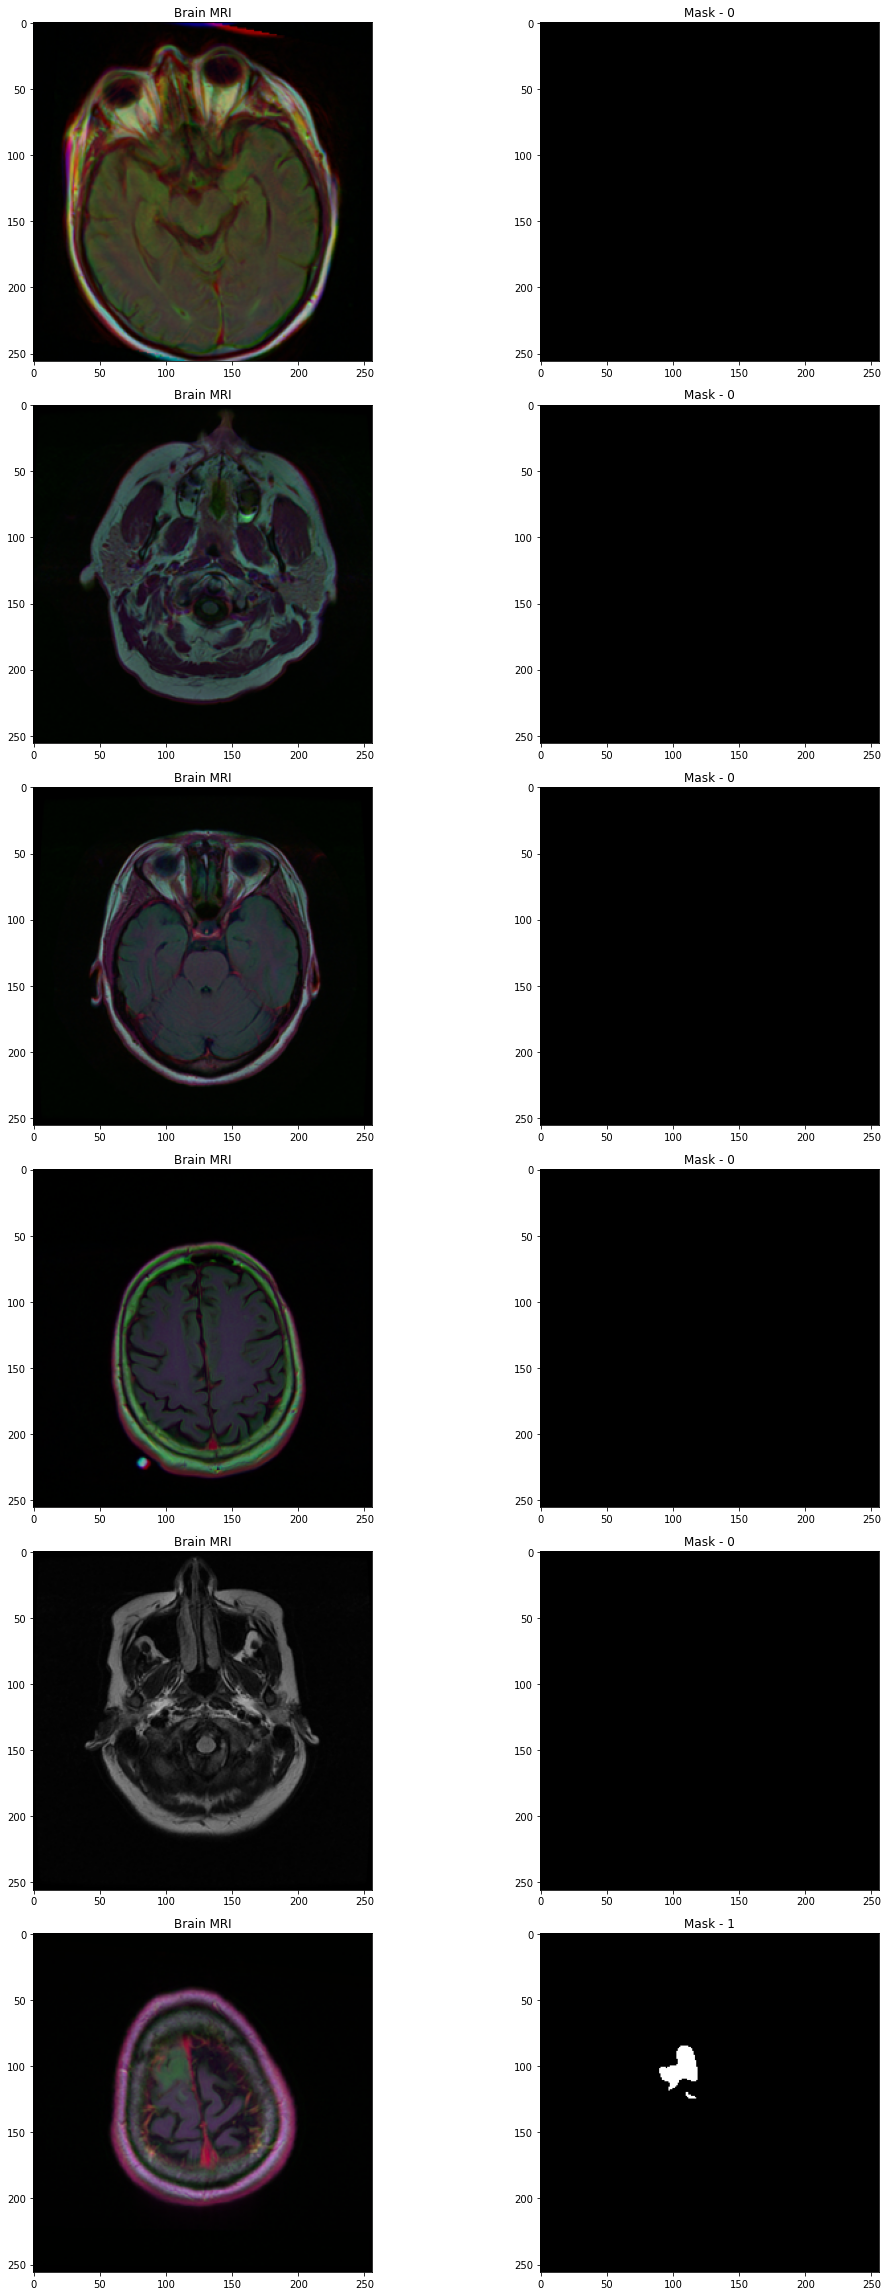

In [17]:
import random
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
    i = random.randint(0, len(brain_df))
    axs[count][0].title.set_text('Brain MRI')
    axs[count][0].imshow(cv2.imread(brain_df.image_path[i]))
    axs[count][1].title.set_text('Mask - ' + str(brain_df['mask'][i]))
    axs[count][1].imshow(cv2.imread(brain_df.mask_path[i]))
    count +=1

fig.tight_layout()

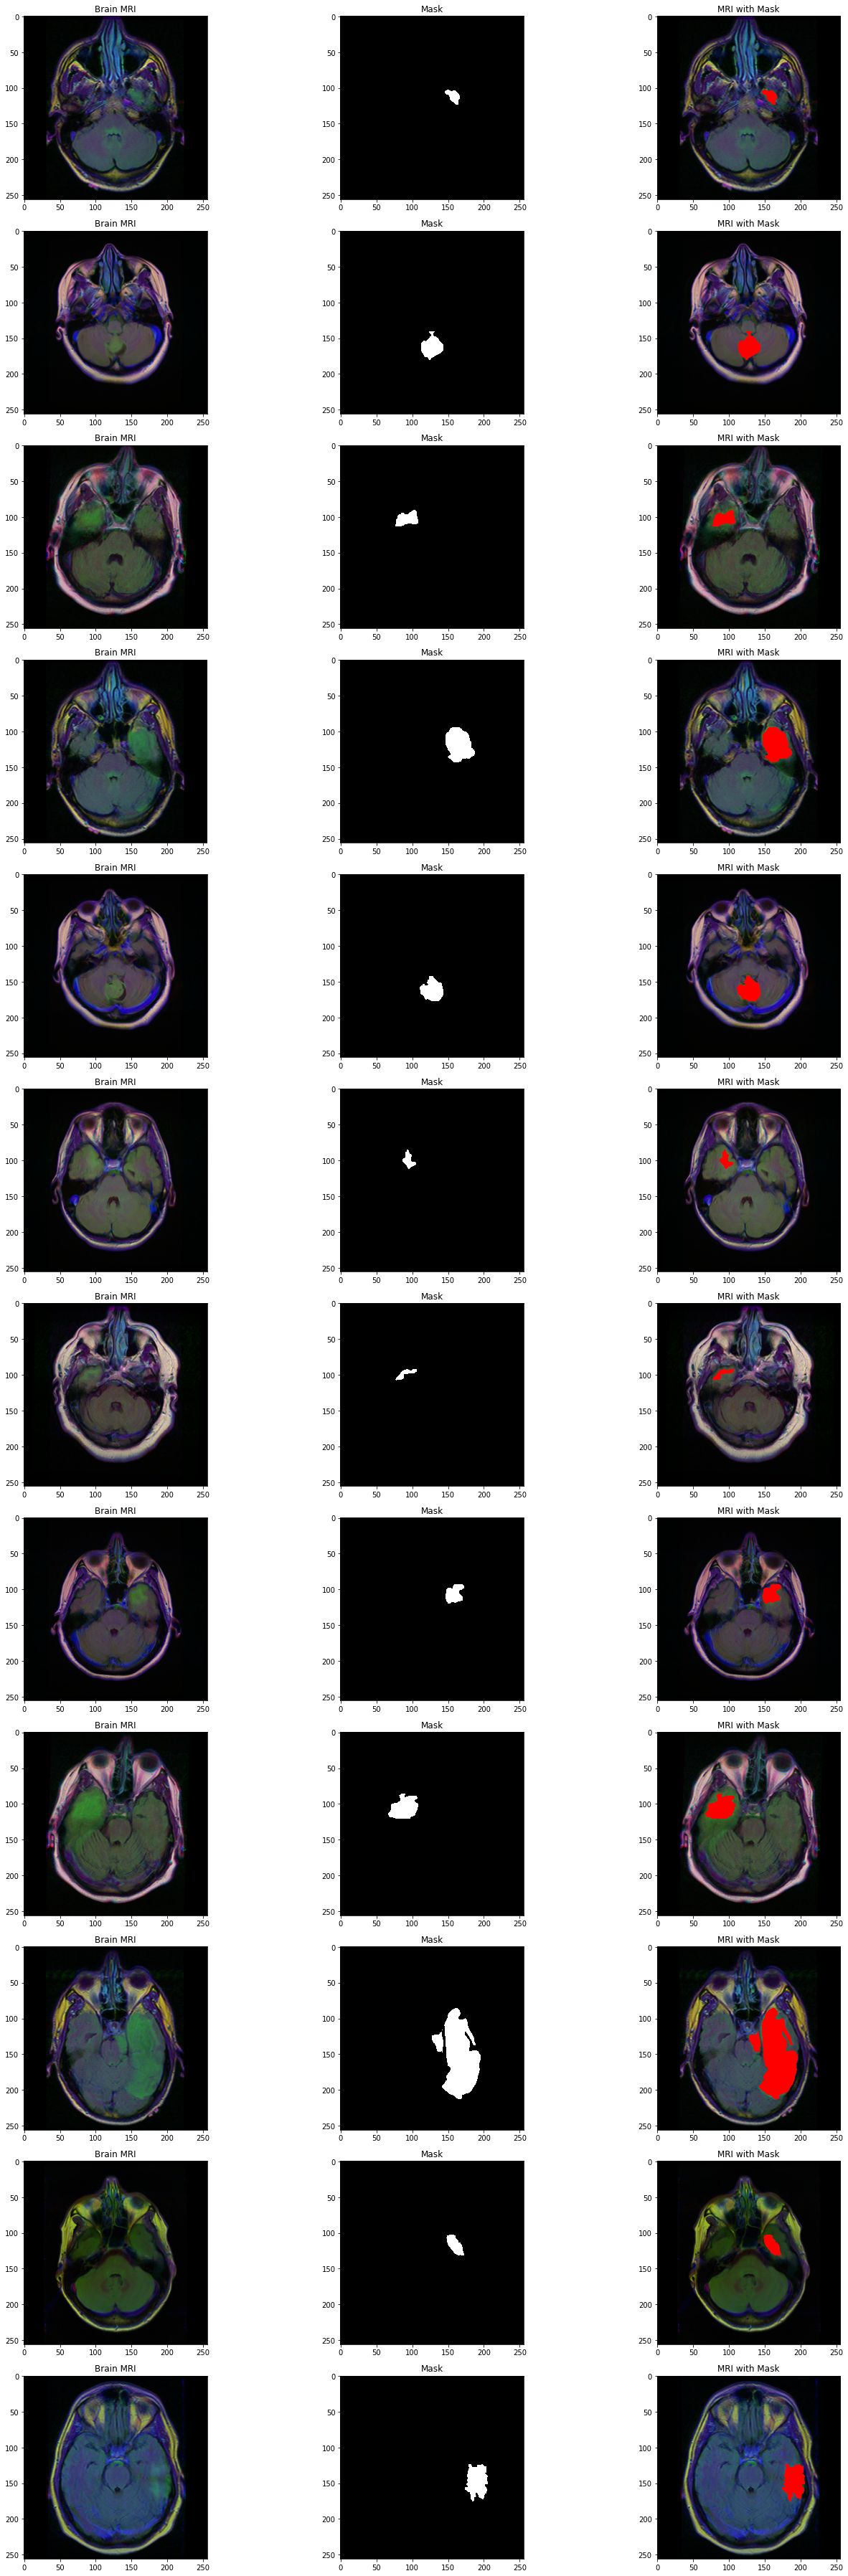

In [18]:
count = 0
fig, axs = plt.subplots(12,3, figsize = (20, 50))
for i in range(len(brain_df)):
    if brain_df['mask'][i] ==1 and  count <12:
        img = io.imread(brain_df.image_path[i])
        axs[count][0].title.set_text('Brain MRI')
        axs[count][0].imshow(img)
        
        mask = io.imread(brain_df.mask_path[i])
        axs[count][1].title.set_text('Mask')
        axs[count][1].imshow(mask, cmap = 'gray')
        
        
        img[mask == 255] = (255, 0, 0)
        axs[count][2].title.set_text('MRI with Mask')
        axs[count][2].imshow(img)
        count +=1
        
fig.tight_layout()
        

In [19]:
brain_df_train = brain_df.drop(columns= ['patient_id'])
brain_df_train.shape

(3929, 3)

In [20]:
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x: str(x))

In [21]:
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(brain_df_train, test_size= 0.15)

In [23]:
from keras_preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255., validation_split=0.15)

In [24]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory='./',
    x_col='image_path',
    y_col='mask',
    subset="training",
    batch_size=16,
    shuffle=True,
    class_mode="categorical",
    target_size = (256,256))

valid_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory='./',
    x_col='image_path',
    y_col='mask',
    subset = "validation",
    batch_size=16,
    shuffle=True,
    class_mode="categorical",
    target_size=(256,256))

test_datagen = ImageDataGenerator(rescale=1./255.)

test_generator = test_datagen.flow_from_dataframe(
dataframe=test,
directory='./',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))


Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [25]:
basemodel = ResNet50(weights='imagenet', include_top= False, input_tensor= Input(shape=(256,256,3)))

In [26]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [27]:
for layer in basemodel.layers:
    layer.trainable= False

In [28]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(256, activation="relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation="relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation="softmax")(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

__________________________________________________________________________________________________
conv3_block2_2_bn (BatchNormali (None, 32, 32, 128)  512         conv3_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block2_2_relu (Activation (None, 32, 32, 128)  0           conv3_block2_2_bn[0][0]          
__________________________________________________________________________________________________
conv3_block2_3_conv (Conv2D)    (None, 32, 32, 512)  66048       conv3_block2_2_relu[0][0]        
__________________________________________________________________________________________________
conv3_block2_3_bn (BatchNormali (None, 32, 32, 512)  2048        conv3_block2_3_conv[0][0]        
__________________________________________________________________________________________________
conv3_block2_add (Add)          (None, 32, 32, 512)  0           conv3_block1_out[0][0]           
          

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [31]:
earlystopping = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience=20)
checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

In [32]:
history = model.fit(train_generator, steps_per_epoch=train_generator.n //16, epochs=1, validation_data=valid_generator, validation_steps=valid_generator.n // 16, callbacks=[checkpointer,earlystopping])

177/177 [==============================] - ETA: 0s - loss: 0.7226 - accuracy: 0.6185
Epoch 00001: val_loss improved from inf to 0.62492, saving model to classifier-resnet-weights.hdf5
177/177 [==============================] - 161s 911ms/step - loss: 0.7226 - accuracy: 0.6185 - val_loss: 0.6249 - val_accuracy: 0.6935


In [33]:
model_json = model.to_json()
with open("classifier-resnet-model.json", "w") as json_file:
    json_file.write(model_json)

In [34]:
with open('resnet-50-MRI.json', 'r') as json_file:
    json_savedModel = json_file.read()

model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('weights.hdf5')
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [35]:
test_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose =1 )

36/36 [==============================] - 27s 754ms/step


In [36]:
test_predict.shape

(576, 2)

In [37]:
test_predict

array([[1.2809080e-09, 1.0000000e+00],
       [9.9997723e-01, 2.2809349e-05],
       [9.9991560e-01, 8.4414554e-05],
       ...,
       [9.9998486e-01, 1.5148625e-05],
       [4.2386986e-14, 1.0000000e+00],
       [1.0000000e+00, 1.6294411e-08]], dtype=float32)

In [38]:
predict = []

for i in test_predict:
    predict.append(str(np.argmax(i)))

predict = np.asarray(predict)

In [39]:
predict

array(['1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1',
       '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0',
       '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0',
       '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1',
       '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0',
       '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0

In [40]:
original = np.asarray(test['mask'])[:len(predict)]
len(original)

576

In [41]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, predict)
accuracy

0.9791666666666666

<AxesSubplot:>

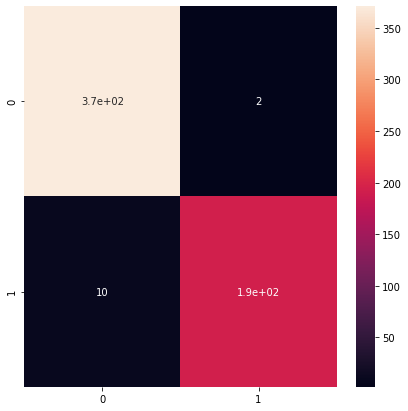

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, predict)
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True)

In [43]:
from sklearn.metrics import classification_report

report = classification_report(original, predict, labels=[0,1])
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       373
           1       0.99      0.95      0.97       203

   micro avg       0.98      0.98      0.98       576
   macro avg       0.98      0.97      0.98       576
weighted avg       0.98      0.98      0.98       576



d:\data\deep\lib\site-packages\numpy\lib\arraysetops.py:579: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

d:\data\deep\lib\site-packages\numpy\lib\arraysetops.py:579: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

d:\data\deep\lib\site-packages\numpy\lib\arraysetops.py:579: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

d:\data\deep\lib\site-packages\numpy\lib\arraysetops.py:579: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [44]:
brain_df_mask = brain_df[brain_df['mask'] == 1]
brain_df_mask.shape

(1373, 4)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_val = train_test_split(brain_df_mask, test_size=0.15)
x_test, x_val = train_test_split(x_val, test_size=0.5)

In [46]:
train_ids = list(x_train.image_path)
train_mask = list(x_train.mask_path)

val_ids = list(x_val.image_path)
val_mask = list(x_val.mask_path)

In [47]:
from utilities import DataGenerator

training_generator = DataGenerator(train_ids, train_mask)
validation_generator = DataGenerator(val_ids, val_mask)

In [53]:
def resblock(X, f):
    X_copy = X
    X = Conv2D(f, kernel_size = (1,1), strides=(1,1), kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f, kernel_size = (3,3), strides=(1,1), padding = 'same', kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    
    X_copy = Conv2D(f, kernel_size = (1,1), strides=(1,1), kernel_initializer='he_normal')(X_copy)
    X_copy = BatchNormalization()(X_copy)
    
    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    
    return X
    

In [54]:
def upsample_concat(x, skip):
    x = UpSampling2D((2,2))(x)
    merge = Concatenate()([x, skip])
    
    return merge    

In [55]:
input_shape = (256, 256, 3)

X_input = Input(input_shape)

conv1_in = Conv2D(16, 3,activation='relu', padding = 'same', kernel_initializer='he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16, 3,activation='relu', padding = 'same', kernel_initializer='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)


conv5_in = resblock(pool_4, 256)


up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)


output = Conv2D(1, (1,1), padding = "same", activation="sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output)

In [56]:
model_seg.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 256, 256, 16) 448         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 256, 256, 16) 64          conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 256, 256, 16) 2320        batch_normalization_4[0][0]      
____________________________________________________________________________________________

In [57]:
from utilities import focal_tversky, tversky_loss, tversky

In [58]:
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon=0.1)
model_seg.compile(optimizer=adam, loss=focal_tversky, metrics=[tversky])

In [59]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=20)
checkpointer = ModelCheckpoint(filepath='ResUNet-weights.hdf5', verbose=1, save_best_only=True)

In [63]:
history = model_seg.fit(training_generator, epochs=1, validation_data= validation_generator, callbacks=[checkpointer, earlystopping])

72/72 [==============================] - ETA: 0s - loss: 0.4501 - tversky: 0.6522
Epoch 00001: val_loss improved from 0.72503 to 0.55508, saving model to ResUNet-weights.hdf5
72/72 [==============================] - 613s 9s/step - loss: 0.4501 - tversky: 0.6522 - val_loss: 0.5551 - val_tversky: 0.5428


In [64]:
model_json = model_seg.to_json()
with open("ResUNet-model.json", "w") as json_file:
    json_file.write(model_json)

In [66]:
from utilities import focal_tversky, tversky_loss, tversky

with open("ResUNet-MRI.json", 'r') as json_file:
    json_savedModel= json_file.read()
    
model_seg = tf.keras.models.model_from_json(json_savedModel)
model_seg.load_weights('weights_seg.hdf5')
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon=0.1)
model_seg.compile(optimizer=adam, loss= focal_tversky, metrics=[tversky])

In [68]:
from utilities import prediction

image_id, mask, has_mask = prediction(test, model, model_seg)

In [75]:
df_pred = pd.DataFrame({'image_path': image_id, 'predicted_mask': mask, 'has_mask': has_mask})
df_pred

image_path  \
0    TCGA_FG_A4MU_20030903/TCGA_FG_A4MU_20030903_17...   
1    TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_44...   
2    TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_30...   
3    TCGA_CS_6668_20011025/TCGA_CS_6668_20011025_3.tif   
4    TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_29...   
..                                                 ...   
585  TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_12...   
586  TCGA_FG_8189_20030516/TCGA_FG_8189_20030516_31...   
587  TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_8.tif   
588  TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_26...   
589  TCGA_HT_7882_19970125/TCGA_HT_7882_19970125_25...   

                                        predicted_mask  has_mask  
0    [[[[3.11588e-06], [7.2294815e-06], [1.7687333e...         1  
1                                              No mask         0  
2                                              No mask         0  
3                                              No mask         0  
4    [[[[6.685205e-07], [2.3105003e-06], [4.2082256...         1  
..                                                 ...       ...  
585  [[[[6.842709e-07], [2.862397e-06], [7.4518316e...         1  
586  [[[[1.0273131e-06], [5.579259e-06], [1.0385484...         1  
587                                            No mask         0  
588                                            No mask         0  
589  [[[[7.570404e-07], [2.7330198e-06], [5.284543e...         1  

[590 rows x 3 columns]

In [81]:
df_pred = test.merge(df_pred, on='image_path')
df_pred.head()

image_path  \
0  TCGA_FG_A4MU_20030903/TCGA_FG_A4MU_20030903_17...   
1  TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_44...   
2  TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_30...   
3  TCGA_CS_6668_20011025/TCGA_CS_6668_20011025_3.tif   
4  TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_29...   

                                           mask_path mask  \
0  TCGA_FG_A4MU_20030903/TCGA_FG_A4MU_20030903_17...    1   
1  TCGA_FG_6689_20020326/TCGA_FG_6689_20020326_44...    0   
2  TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_30...    0   
3  TCGA_CS_6668_20011025/TCGA_CS_6668_20011025_3_...    0   
4  TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_29...    1   

                                      predicted_mask  has_mask  
0  [[[[3.11588e-06], [7.2294815e-06], [1.7687333e...         1  
1                                            No mask         0  
2                                            No mask         0  
3                                            No mask         0  
4  [[[[6.685205e-07], [2.3105003e-06], [4.2082256...         1

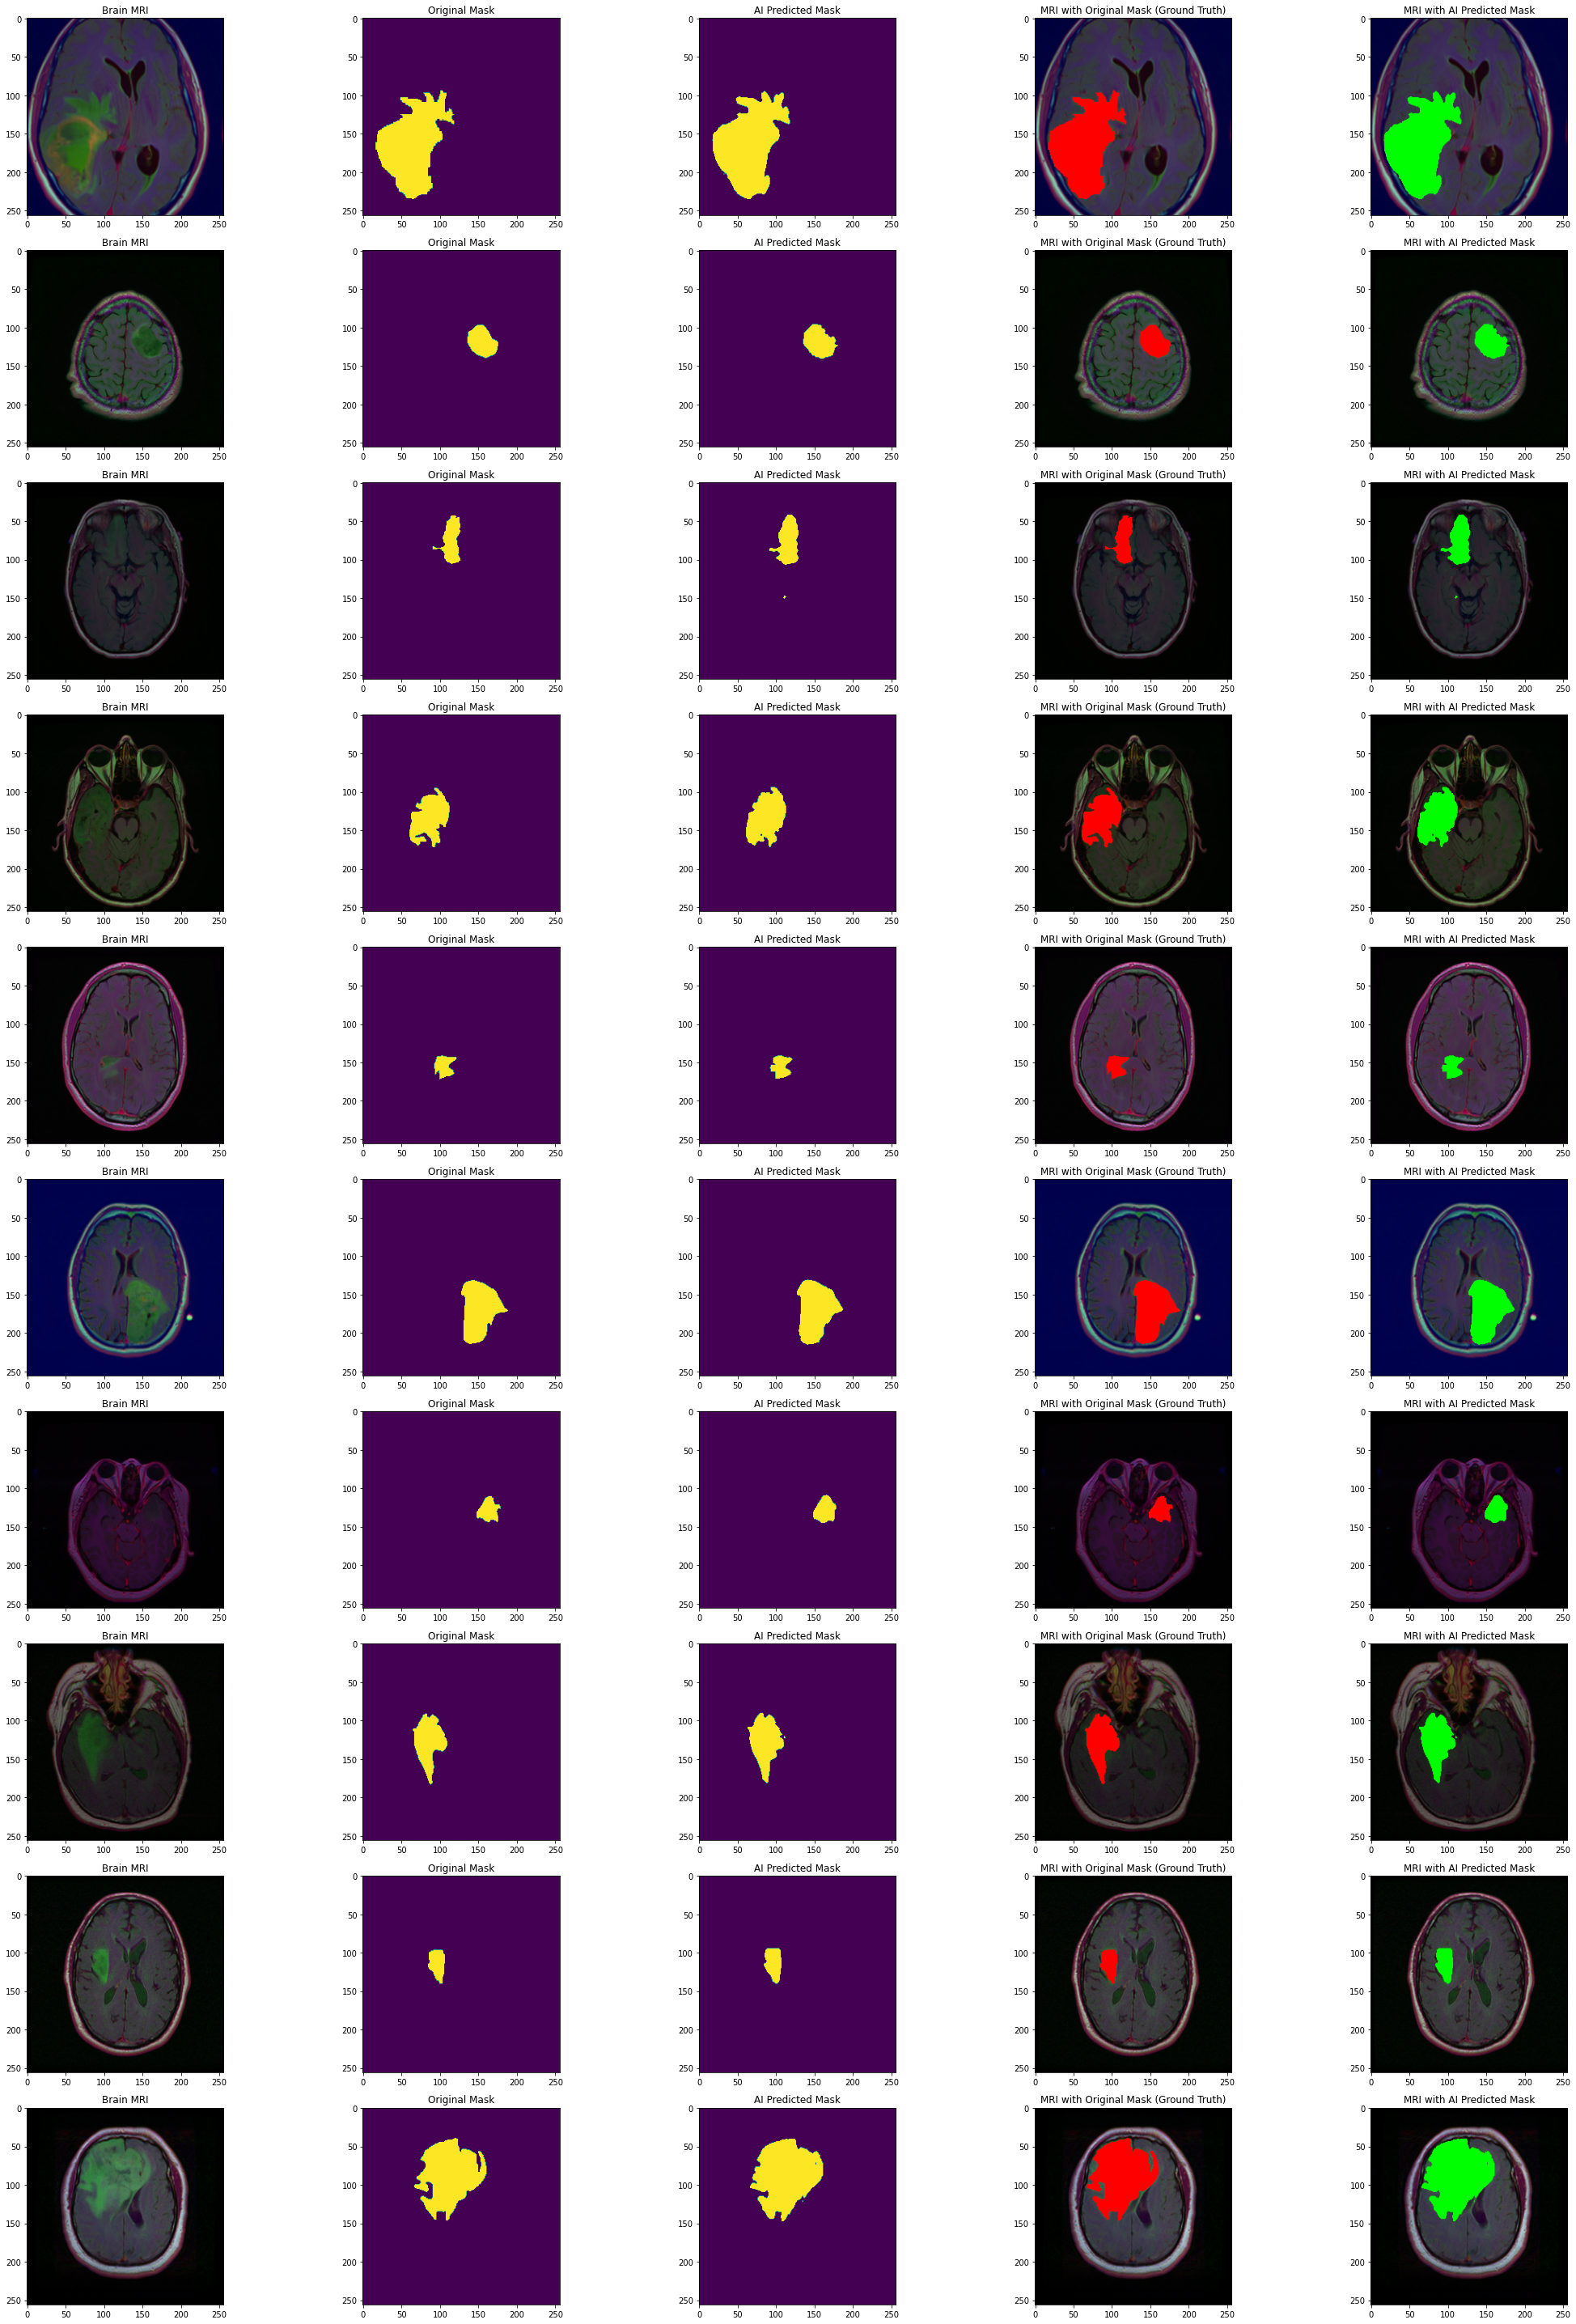

In [82]:
count = 0
fig, axs = plt.subplots(10, 5, figsize=(30, 40))
for i in range(len(df_pred)):
    if df_pred['has_mask'][i] == 1 and count < 10:
        img = io.imread(df_pred.image_path[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[count][0].title.set_text("Brain MRI")
        axs[count][0].imshow(img)
        
        mask = io.imread(df_pred.mask_path[i])
        axs[count][1].title.set_text("Original Mask")
        axs[count][1].imshow(mask)
        
        predicted_mask = np.asarray(df_pred.predicted_mask[i])[0].squeeze().round()
        axs[count][2].title.set_text("AI Predicted Mask")
        axs[count][2].imshow(predicted_mask)
        
        img[mask == 255] = (255, 0, 0)
        axs[count][3].title.set_text("MRI with Original Mask (Ground Truth)")
        axs[count][3].imshow(img)
        
        
        img_ = io.imread(df_pred.image_path[i])
        img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
        img_[predicted_mask == 1] = (0,255,0)
        axs[count][4].title.set_text("MRI with AI Predicted Mask")
        axs[count][4].imshow(img_)
        count +=1
        
fig.tight_layout()